In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import warnings
from IPython.display import Audio
warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk("C:\\Users\\eesha\\Downloads\\TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
df=pd.DataFrame()
df['speech']=paths
df['labels']=labels

In [4]:
df['labels'].value_counts()

labels
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

In [5]:
df['labels']

0       angry
1       angry
2       angry
3       angry
4       angry
        ...  
2795      sad
2796      sad
2797      sad
2798      sad
2799      sad
Name: labels, Length: 2800, dtype: object

In [6]:
df.head()

,speech,labels
0,C:\Users\eesha\Downloads\TESS Toronto emotiona...,angry
1,C:\Users\eesha\Downloads\TESS Toronto emotiona...,angry
2,C:\Users\eesha\Downloads\TESS Toronto emotiona...,angry
3,C:\Users\eesha\Downloads\TESS Toronto emotiona...,angry
4,C:\Users\eesha\Downloads\TESS Toronto emotiona...,angry


In [7]:
considered_emotions=['happy','sad','angry','neutral']

In [8]:
def create_waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(emotion), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

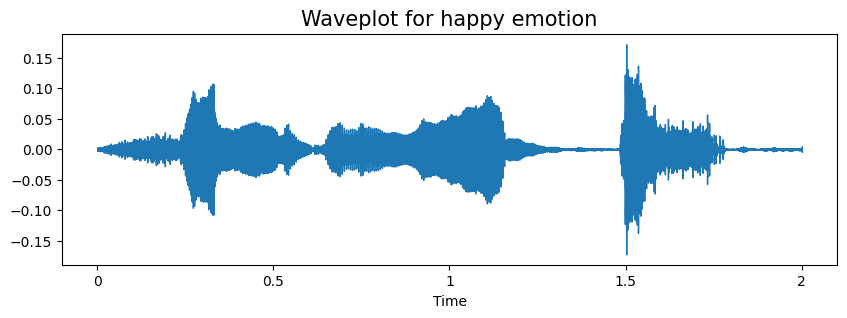

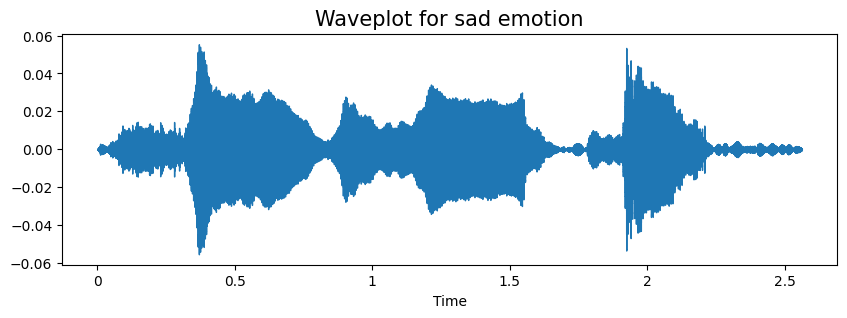

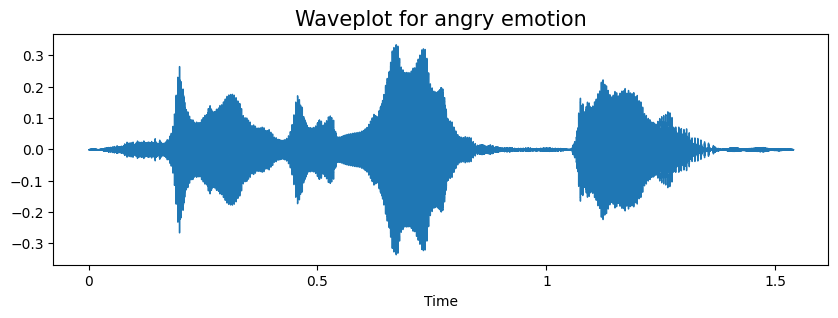

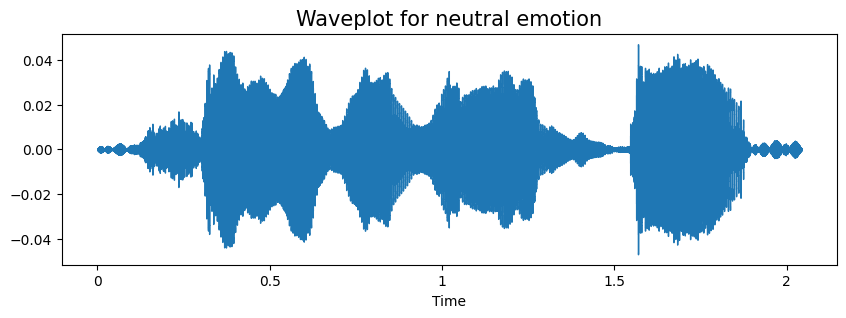

In [9]:
for i in considered_emotions:
    path = np.array(df['speech'][df['labels']==i])[0]
    data, sampling_rate = librosa.load(path)
    create_waveplot(data, sampling_rate, i)
    Audio(path)

In [10]:
def create_spectrogram(data, sr, emotion):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {} emotion'.format(emotion), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')  
    plt.colorbar()

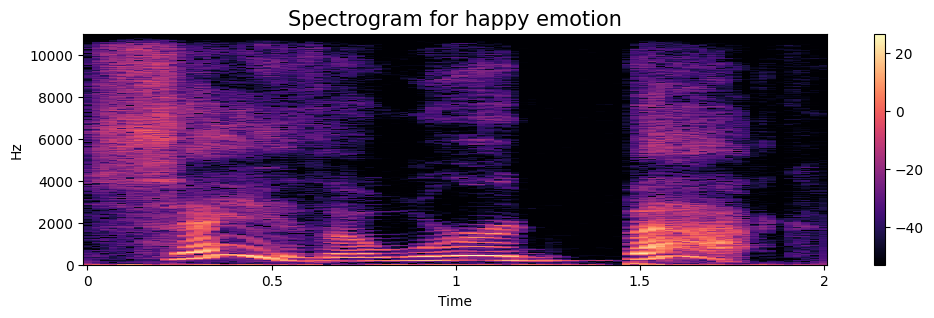

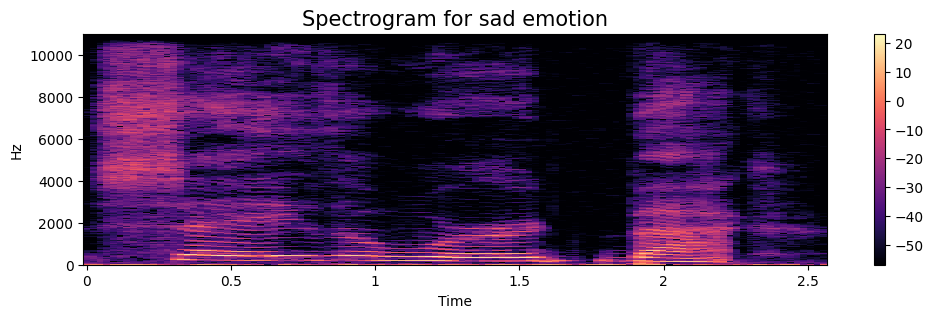

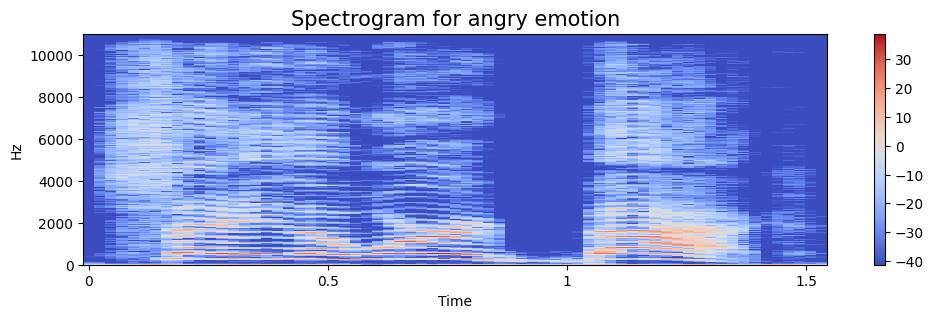

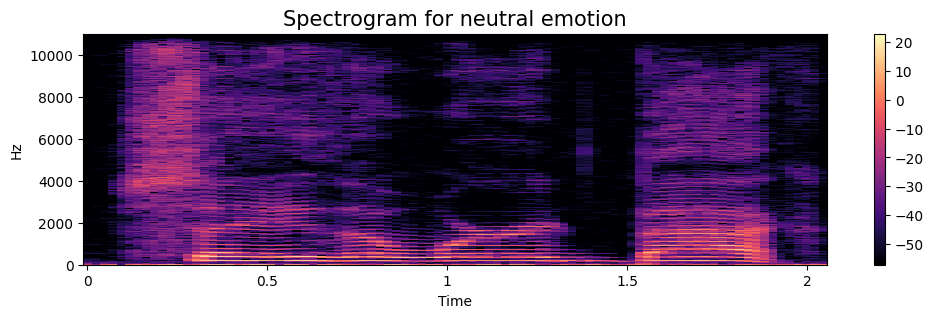

In [11]:
for i in considered_emotions:
    path = np.array(df['speech'][df['labels']==i])[0]
    data, sampling_rate = librosa.load(path)
    create_spectrogram(data, sampling_rate, i)
    Audio(path)

In [12]:
filtered_df = df[df['labels'].isin(considered_emotions)]

In [176]:
filtered_df['labels']

0       angry
1       angry
2       angry
3       angry
4       angry
        ...  
2795      sad
2796      sad
2797      sad
2798      sad
2799      sad
Name: labels, Length: 1600, dtype: object

In [280]:
newdf1 = np.random.rand(len(filtered_df)) < 0.5
train = filtered_df[newdf1]
test = filtered_df[~newdf1]


In [281]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [282]:
extract_mfcc(train['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [283]:
X_mfcc = train['speech'].apply(lambda x: extract_mfcc(x))

In [284]:
Y_mfcc=test['speech'].apply(lambda x: extract_mfcc(x))

In [285]:
Y_mfcc

1       [-465.73267, 98.77373, 0.6560087, -32.74544, -...
4       [-434.05756, 77.4455, 10.865499, 16.092943, 8....
5       [-445.3795, 73.91618, -0.07950791, -2.6314003,...
6       [-428.41193, 80.33891, -3.944671, -5.4349365, ...
7       [-452.1037, 104.47688, 17.366016, -12.362865, ...
                              ...                        
2789    [-530.39307, 120.11345, 33.86298, 14.822116, 2...
2790    [-538.658, 101.62637, 27.200438, 15.198146, 23...
2791    [-557.2867, 110.49659, 39.969234, 14.031246, 2...
2796    [-589.23676, 96.20408, 36.96118, 15.014448, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
Name: speech, Length: 826, dtype: object

In [286]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
2       [-429.79196, 46.124, 1.5550478, -0.2170951, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
9       [-430.26288, 75.791885, 0.56813264, -23.253946...
10      [-386.96872, 79.29636, -6.5276356, -31.62963, ...
                              ...                        
2793    [-567.54724, 109.25698, 33.32319, 19.69575, 26...
2794    [-515.45703, 117.997635, 26.391417, -0.4477385...
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2798    [-548.6142, 110.16424, 31.910236, 12.572517, 2...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: speech, Length: 774, dtype: object

In [287]:
y1 = [xy for xy in Y_mfcc]
yy = np.array(y1)
yy.shape
yy = np.expand_dims(yy, -1)
yy.shape

(826, 40, 1)

In [288]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape
X = np.expand_dims(X, -1)
X.shape

(774, 40, 1)

In [289]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(train[['labels']])
y = y.toarray()
y.shape

(774, 4)

In [290]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 256)               264192    
                                                                 
 dropout_30 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dropout_31 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 4)               

In [291]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
10/10 [==============================] - 3s 143ms/step - loss: 1.0943 - accuracy: 0.5412 - val_loss: 1.0988 - val_accuracy: 0.4323
Epoch 2/50
10/10 [==============================] - 1s 100ms/step - loss: 0.5103 - accuracy: 0.7997 - val_loss: 0.3507 - val_accuracy: 0.8839
Epoch 3/50
10/10 [==============================] - 1s 98ms/step - loss: 0.2009 - accuracy: 0.9289 - val_loss: 0.0399 - val_accuracy: 1.0000
Epoch 4/50
10/10 [==============================] - 1s 99ms/step - loss: 0.1128 - accuracy: 0.9725 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 1s 102ms/step - loss: 0.0716 - accuracy: 0.9758 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 1s 100ms/step - loss: 0.0364 - accuracy: 0.9903 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 1s 98ms/step - loss: 0.0180 - accuracy: 0.9968 - val_loss: 0.0415 - val_accuracy: 0.9806
Epoch 8/5

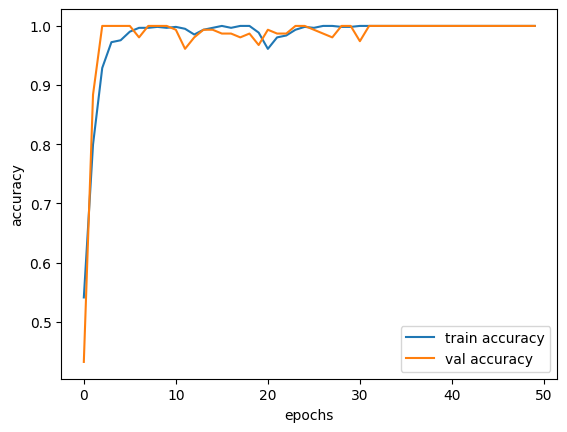

In [292]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

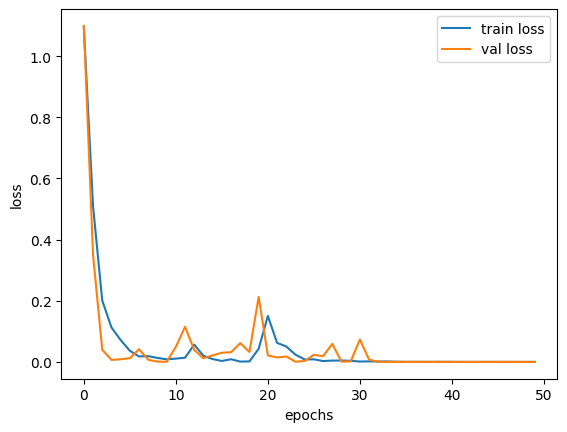

In [293]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [294]:
model_name = 'Emotion_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\eesha\saved_models\Emotion_Voice_Detection_Model.h5 


In [295]:
pred=model.predict(yy)

26/26 [==============================] - 1s 21ms/step


In [296]:
pred


array([[9.9999762e-01, 1.9888557e-06, 7.8071032e-08, 2.3418349e-07],
       [9.9999821e-01, 1.7664039e-06, 4.3611852e-08, 4.8957304e-08],
       [9.9999487e-01, 3.9354836e-06, 1.5734938e-07, 1.0904529e-06],
       ...,
       [4.3348752e-08, 4.1966780e-07, 1.5188986e-07, 9.9999928e-01],
       [4.5610566e-08, 3.9827668e-07, 1.8357586e-07, 9.9999940e-01],
       [2.1088728e-07, 9.7981069e-07, 2.5869124e-07, 9.9999857e-01]],
      dtype=float32)

In [297]:
pred1=pred.argmax(axis=1)

In [298]:
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [299]:
actual=y.argmax(axis=1)

In [300]:
actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [301]:
act_emotions=[considered_emotions[i] for i in actual]
predicted_emotions = [considered_emotions[i] for i in pred1]

In [304]:

for i in range(len(predicted_emotions)):
    print( i,f"  Predicted Emotion: {predicted_emotions[i]} Confidence: {pred[i][preds1[i]]}")


0   Predicted Emotion: happy Confidence: 0.999997615814209
1   Predicted Emotion: happy Confidence: 0.9999982118606567
2   Predicted Emotion: happy Confidence: 0.9999948740005493
3   Predicted Emotion: happy Confidence: 0.9999963045120239
4   Predicted Emotion: happy Confidence: 0.999998927116394
5   Predicted Emotion: happy Confidence: 0.9999970197677612
6   Predicted Emotion: happy Confidence: 0.9999986886978149
7   Predicted Emotion: happy Confidence: 0.9999985694885254
8   Predicted Emotion: happy Confidence: 0.9999992847442627
9   Predicted Emotion: happy Confidence: 0.9999991655349731
10   Predicted Emotion: happy Confidence: 0.9989832043647766
11   Predicted Emotion: happy Confidence: 0.9999959468841553
12   Predicted Emotion: happy Confidence: 0.9999539852142334
13   Predicted Emotion: happy Confidence: 0.999998927116394
14   Predicted Emotion: happy Confidence: 0.9999991655349731
15   Predicted Emotion: happy Confidence: 0.9999988079071045
16   Predicted Emotion: happy Confide